In [4]:
import numpy as np
import pandas as pd
import sklearn as skt
%matplotlib inline
import math
import yfinance as yf
import random
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import folium
import itertools
import scipy
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [5]:
start_date='2021-03-20'
end_date=date.today()
data_nsei=yf.download(tickers='^NSEI',start=start_date,end=end_date)
data_rel=yf.download(tickers='RELIANCE.NS',start=start_date,end=end_date)
data_infy=yf.download(tickers='INFY.NS',start=start_date,end=end_date)
data_hdfc=yf.download(tickers='HDFCBANK.NS',start=start_date,end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
data_nsei.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-21,18246.400391,18262.300781,18133.349609,18159.949219,18159.949219,213800
2022-11-22,18179.150391,18261.849609,18137.699219,18244.199219,18244.199219,177700
2022-11-23,18325.199219,18325.400391,18246.000000,18267.250000,18267.250000,178800
2022-11-24,18326.099609,18529.699219,18294.250000,18484.099609,18484.099609,204000
2022-11-25,18528.449219,18534.900391,18445.099609,18512.750000,18512.750000,205900


In [7]:
data_rel.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-21,2588.0,2588.000000,2543.100098,2550.899902,2550.899902,2949108
2022-11-22,2545.0,2568.500000,2536.500000,2565.050049,2565.050049,3051201
2022-11-23,2575.0,2577.899902,2552.250000,2557.050049,2557.050049,2959787
2022-11-24,2566.0,2594.000000,2548.199951,2579.100098,2579.100098,4333225
2022-11-25,2589.0,2624.899902,2582.100098,2617.600098,2617.600098,3391988


In [8]:
data_infy.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-21,1582.099976,1587.849976,1564.050049,1568.199951,1568.199951,3071764
2022-11-22,1569.000000,1588.000000,1562.000000,1585.050049,1585.050049,3399329
2022-11-23,1588.900024,1592.000000,1579.300049,1583.150024,1583.150024,3245067
2022-11-24,1589.000000,1636.000000,1584.750000,1629.800049,1629.800049,5282215
2022-11-25,1631.400024,1644.000000,1613.800049,1635.650024,1635.650024,4563255


In [9]:
data_hdfc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-21,1607.650024,1612.000000,1590.199951,1597.349976,1597.349976,4172408
2022-11-22,1600.000000,1604.349976,1591.000000,1595.000000,1595.000000,4273157
2022-11-23,1605.000000,1605.000000,1594.000000,1599.150024,1599.150024,5092869
2022-11-24,1605.949951,1632.000000,1599.150024,1625.150024,1625.150024,8598980
2022-11-25,1629.699951,1631.699951,1614.099976,1617.650024,1617.650024,4205248


In [10]:
company_list=[data_nsei,data_rel,data_infy,data_hdfc]
tech_list=['NSEI','RELIANCE','INFOSYS','HDFC BANK']

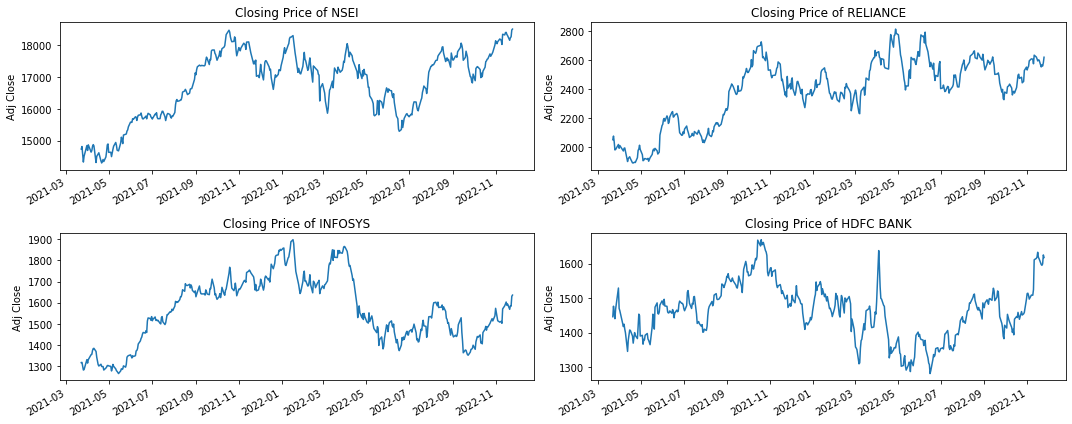

In [11]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

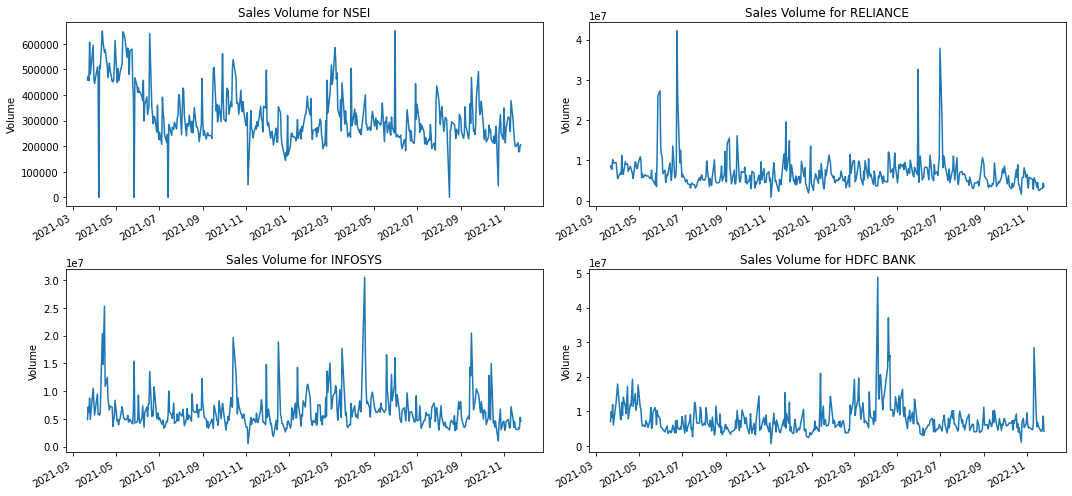

In [12]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout() 

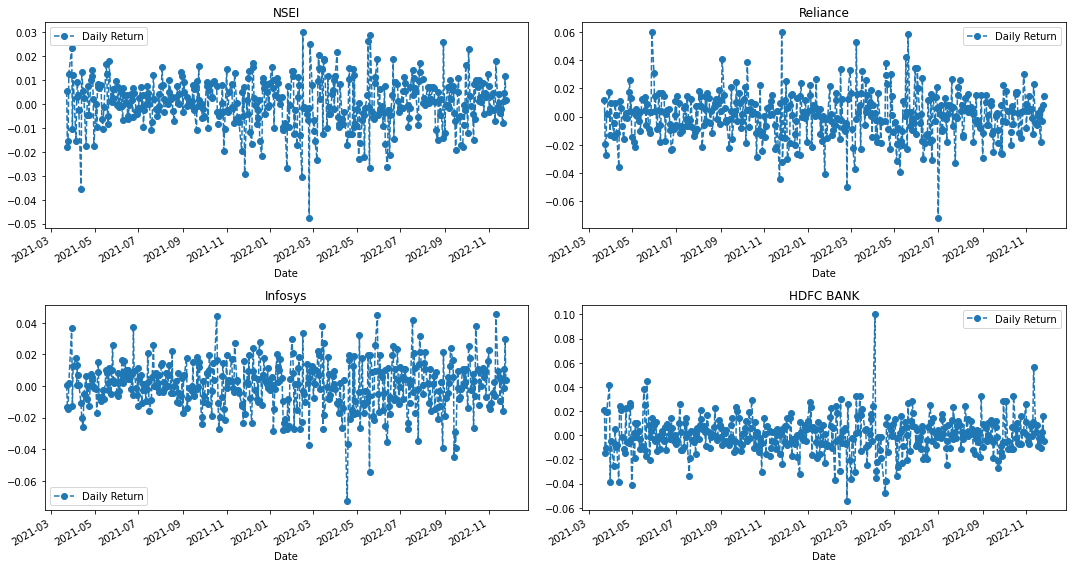

In [13]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

data_nsei['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('NSEI')

data_rel['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Reliance')

data_infy['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Infosys')

data_hdfc['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('HDFC BANK')

fig.tight_layout()

In [14]:
from pandas_datareader import DataReader

In [15]:
closing_df = DataReader(['^NSEI','RELIANCE.NS','INFY.NS','HDFCBANK.NS'], 'yahoo', start_date, end_date)['Adj Close']

closing_df.tail() 

Symbols,^NSEI,RELIANCE.NS,INFY.NS,HDFCBANK.NS
Date,,,,
2022-11-22,18244.199219,2565.050049,1585.050049,1595.000000
2022-11-23,18267.250000,2557.050049,1583.150024,1599.150024
2022-11-24,18484.099609,2579.100098,1629.800049,1625.150024
2022-11-25,18512.750000,2617.600098,1635.650024,1617.650024
2022-11-28,18598.500000,2708.100098,1641.599976,1603.050049


In [16]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,^NSEI,RELIANCE.NS,INFY.NS,HDFCBANK.NS
Date,,,,
2021-03-22,NaN,NaN,NaN,NaN
2021-03-23,0.005317,0.012170,0.000547,0.021101
2021-03-24,-0.017911,-0.019257,-0.012978,-0.014232
2021-03-25,-0.015430,-0.027280,-0.014737,-0.010448
2021-03-26,0.012733,0.001607,0.001799,0.019100


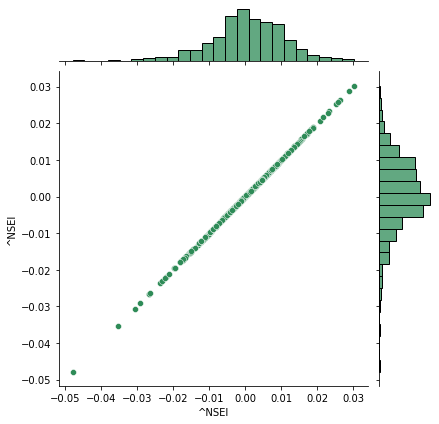

In [17]:
# Comparing NSEI to itself should show a perfectly linear relationship
sns.jointplot(x='^NSEI', y='^NSEI', data=tech_rets, kind='scatter', color='seagreen')

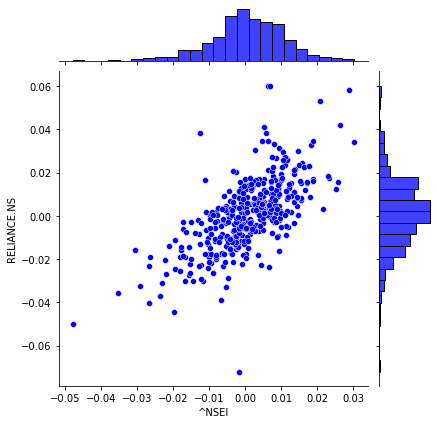

In [18]:
# Comparing NSEI to Reliance should show a perfectly linear relationship
sns.jointplot(x='^NSEI', y='RELIANCE.NS', data=tech_rets, kind='scatter', color='blue')

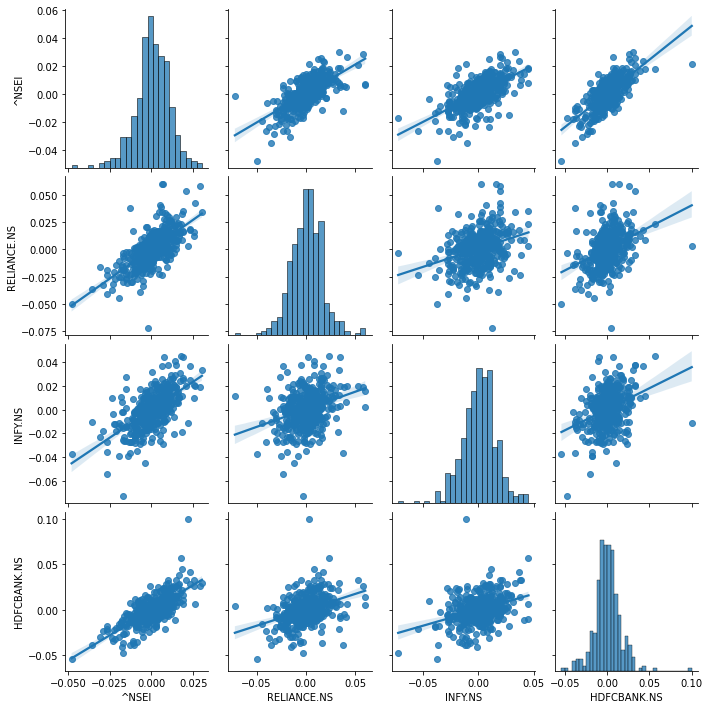

In [19]:
sns.pairplot(tech_rets, kind='reg')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

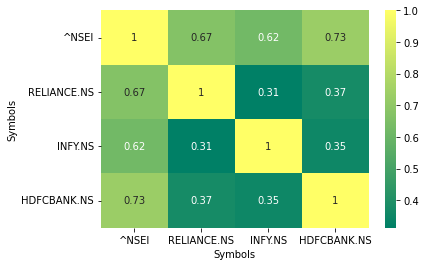

In [20]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

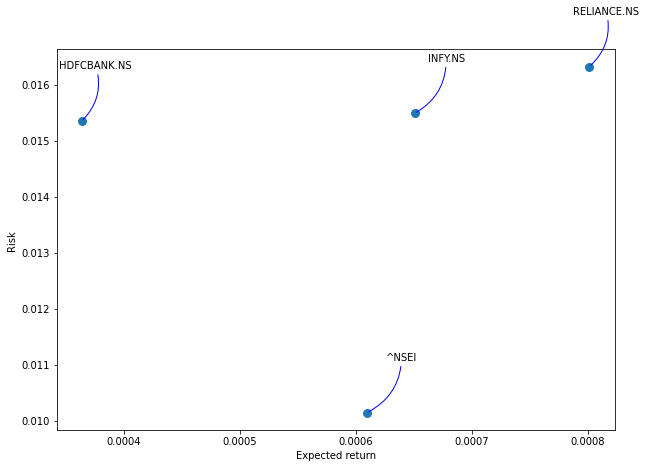

In [21]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [22]:
# Get the stock quote
df = DataReader('^NSEI', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-22,18261.849609,18137.699219,18179.150391,18244.199219,177700.0,18244.199219
2022-11-23,18325.400391,18246.000000,18325.199219,18267.250000,178800.0,18267.250000
2022-11-24,18529.699219,18294.250000,18326.099609,18484.099609,204000.0,18484.099609
2022-11-25,18534.900391,18445.099609,18528.449219,18512.750000,205900.0,18512.750000
2022-11-28,18611.050781,18365.599609,18430.550781,18598.099609,0.0,18598.099609


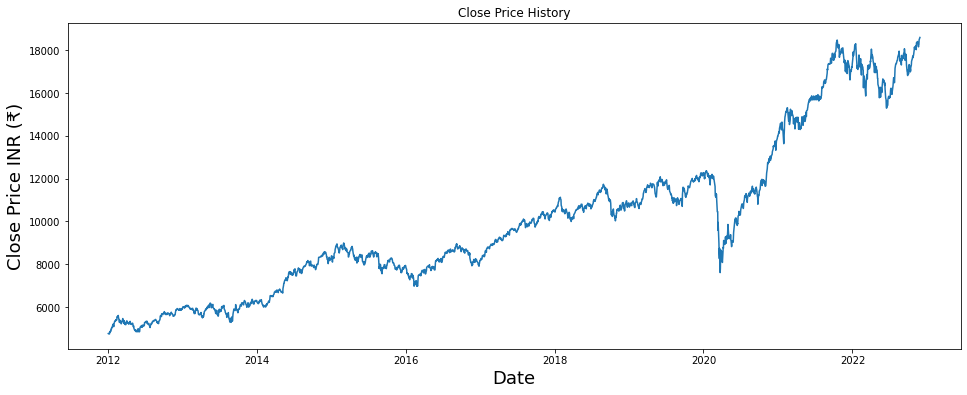

In [23]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (₹)', fontsize=18)
plt.show()

In [24]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2540

In [25]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.62392733e-03],
       [4.94402702e-04],
       [5.16076211e-04],
       ...,
       [9.91772102e-01],
       [9.93839931e-01],
       [1.00000000e+00]])

In [26]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00162393, 0.0004944 , 0.00051608, 0.00081559, 0.        ,
       0.00770463, 0.00852745, 0.00638385, 0.00889192, 0.00946209,
       0.01620319, 0.01537318, 0.01989131, 0.022071  , 0.02190138,
       0.02775474, 0.02998852, 0.03333745, 0.02486413, 0.03294409,
       0.03557486, 0.03804321, 0.04208139, 0.04466523, 0.0427526 ,
       0.04513436, 0.04832449, 0.04610512, 0.04672583, 0.04859151,
       0.05695657, 0.05623483, 0.05929139, 0.06238408, 0.05503672,
       0.05344525, 0.04954783, 0.0388588 , 0.04566485, 0.04636496,
       0.04308461, 0.04449924, 0.03879745, 0.03461492, 0.0344742 ,
       0.04263711, 0.04451365, 0.04956228, 0.05204507, 0.04602572,
       0.04150759, 0.03711576, 0.03840049, 0.04490342, 0.0350516 ,
       0.03864228, 0.03186147, 0.03611254, 0.0326193 , 0.03147173])]
[0.03989448137477292]

[array([0.00162393, 0.0004944 , 0.00051608, 0.00081559, 0.        ,
       0.00770463, 0.00852745, 0.00638385, 0.00889192, 0.00946209,
       0.01620319, 0.01537318, 0.01

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2022-11-28 07:56:55.095694: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-28 07:56:55.555659: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


2480/2480 [==============================] - 51s 20ms/step - loss: 0.0011


In [28]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

324.79741661660694

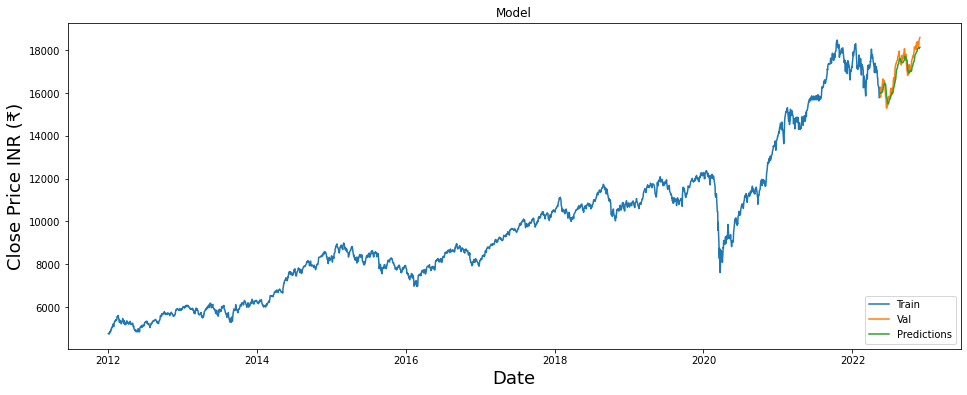

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (₹)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

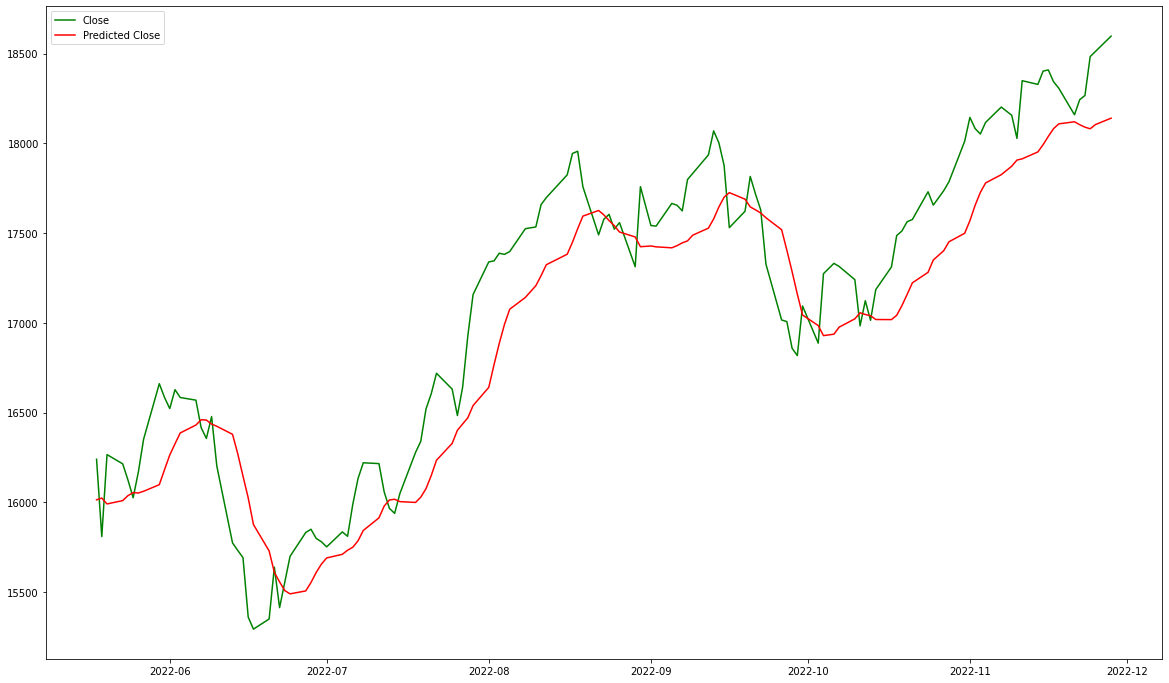

In [30]:
plt.figure(figsize=(20,12))
plt.plot(valid['Close'],color='green')
plt.plot(valid['Predictions'],color='red')
plt.legend(['Close','Predicted Close'])
plt.show()

In [31]:
valid.tail()

,Close,Predictions
Date,,
2022-11-22,18244.199219,18104.480469
2022-11-23,18267.250000,18090.759766
2022-11-24,18484.099609,18081.738281
2022-11-25,18512.750000,18105.044922
2022-11-28,18598.099609,18140.912109
